In [1]:
import sklearn 
assert sklearn.__version__ >= "0.20" # sklearn ≥0.2 is required
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
np.random.seed(42) # to output the same across runs
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [66]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # sepal length, sepal width, petal length, petal width
y = iris["target"]
setosa_or_virginica = (y == 0) | (y == 2)
X = X[setosa_or_virginica]  # use only 2 classes: setosa, virginica
y = y[setosa_or_virginica]


In [67]:

def plot_samples(subplot, with_legend=False, with_ylabel=False):
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "b^", label="Iris virginica")
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "go", label="Iris setosa")
    plt.xlabel("Petal length", fontsize=14)
    plt.axis([0, 7, 0, 3])
    if with_legend: plt.legend(loc="upper left", fontsize=14)
    if with_ylabel: plt.ylabel("Petal width", fontsize=14)


In [68]:
x1 = np.array([0, 5.5]) # points to plot
x2_model_1 = 4*x1 - 18
x2_model_2 = 1.2*x1 - 2.5
from sklearn.svm import LinearSVC # faster than SVC on large datasets
svm_clf = LinearSVC(C=np.inf) # C: larger => 'harder margins'. loss = 'hinge': a loss of SVM
svm_clf.fit(X, y)
svm_clf.predict(X) # Predicted labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Text(0.5, 1.0, 'Decision boundary of model 1')

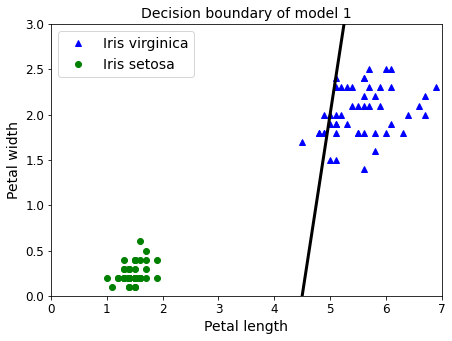

In [69]:
plt.figure(figsize = [7, 5])
plot_samples(subplot='111', with_legend=True, with_ylabel=True)
plt.plot(x1, x2_model_1, "k-", linewidth=3)
plt.title("Decision boundary of model 1", fontsize=14)


Text(0.5, 1.0, 'Decision boundary of model 2')

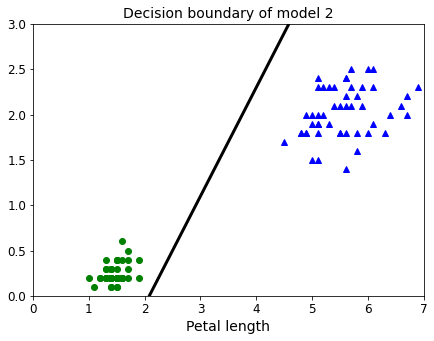

In [70]:
plt.figure(figsize = [7, 5])
plot_samples(subplot='132')
plt.plot(x1, x2_model_2, "k-", linewidth=3)
plt.title("Decision boundary of model 2", fontsize=14)

In [71]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    # Plot decision boundary:
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]        
    x1 = np.linspace(xmin, xmax, 200)
    x2 = -w[0]/w[1]*x1 - b/w[1] # Note: At the decision boundary, w1*x1 + w2*x2 + b = 0 => x2 = -w1/w2 * x1 - b/w2
    plt.plot(x1, x2, "k-", linewidth=3, label="SVM")
    
    # Plot gutters of the margin:
    margin = 1/w[1]
    right_gutter = x2 + margin
    left_gutter = x2 - margin
    plt.plot(x1, right_gutter, "k:", linewidth=2)
    plt.plot(x1, left_gutter, "k:", linewidth=2)

    # Highlight samples at the gutters (support vectors):
    skipped=True
    if not skipped:
        hinge_labels = y*2 - 1 # hinge loss label: -1, 1. our label y: 0, 1
        scores = X.dot(w) + b
        support_vectors_id = (hinge_labels*scores < 1).ravel()
        svm_clf.support_vectors_ = X[support_vectors_id]      
        svs = svm_clf.support_vectors_
        plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')

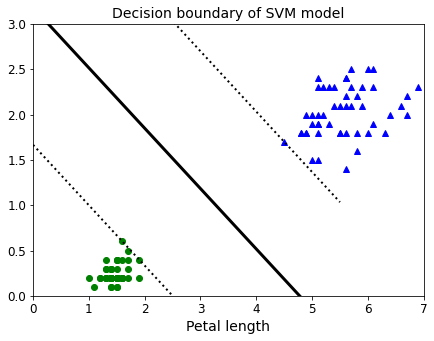

In [72]:
plt.figure(figsize = [7, 5])
plot_samples(subplot='133')
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.title("Decision boundary of SVM model", fontsize=14)
#plt.savefig("figs/01_Decision boundaries.png")
plt.show()

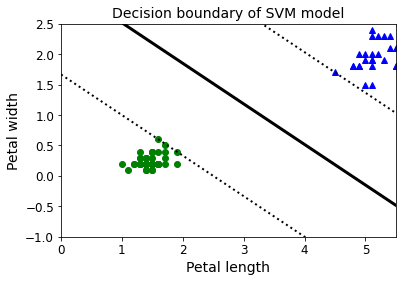

In [73]:
# Plot SVM model in a separate figure
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "b^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "go")
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis("square")
plt.axis([0, 5.5, -1, 2.5])
plt.title("Decision boundary of SVM model", fontsize=14)
plt.savefig("figs/02_Linear_SVM")
plt.show()

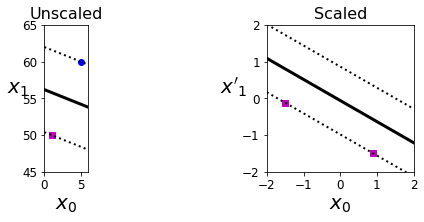

In [74]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0,2 , 2])
from sklearn.svm import SVC 
svm_clf = SVC(kernel="linear", C=1000)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(9,2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==2], Xs[:, 1][ys==2], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis("square")
#plt.axis([0, 6, 0, 90])
plt.axis([0, 6, 45, 65])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("Scaled", fontsize=16)
plt.axis("square")
#plt.axis([0, 20, 0, 80])
plt.axis([-2, 2, -2, 2])
plt.show()

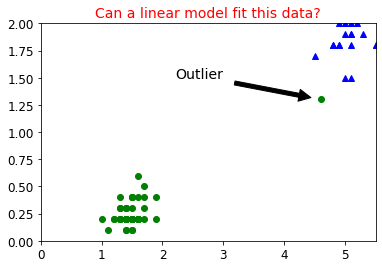

In [75]:
Xo1 = np.concatenate([X, [[4.6, 1.3]]], axis=0)
yo1 = np.concatenate([y, [0]], axis=0)      
# Plot new training data
let_plot=True
if let_plot:
    plt.plot(Xo1[:, 0][yo1==2], Xo1[:, 1][yo1==2], "b^")
    plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "go")
    #plt.text(0.4, 1.8, "Impossible!", fontsize=16, color="red")
    plt.annotate("Outlier", xytext=(2.6, 1.5),
                 xy=(Xo1[-1][0], Xo1[-1][1]),
                 arrowprops=dict(facecolor='black', shrink=0.1),
                 ha="center", fontsize=14 )
    plt.axis([0, 5.5, 0, 2])
    plt.title("Can a linear model fit this data?", color="red", fontsize=14)
    plt.show()

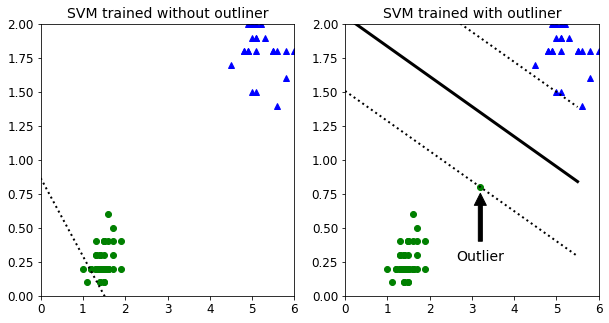

In [76]:
Xo2 = np.concatenate([X, [[3.2, 0.8]]], axis=0)
yo2 = np.concatenate([y, [0]], axis=0)    
# Train and plot SVM models  
svm_clf2 = LinearSVC(C=np.Inf, max_iter=5000, random_state=42)
svm_clf2.fit(Xo2, yo2)
if let_plot:
    # Plot SVM trained without outlier 
    plt.figure(figsize = [10, 5])
    plt.subplot(1,2,1)
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "b^")
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "go")    
    plot_svc_decision_boundary(svm_clf, 0, 5.5)
    plt.title("SVM trained without outliner", fontsize=14 )
    plt.axis([0, 6, 0, 2])
    
    plt.subplot(1,2,2)
    plt.plot(Xo2[:, 0][yo2==2], Xo2[:, 1][yo2==2], "b^")
    plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "go")
    plt.annotate("Outlier", xytext=(3.2, 0.26),
                 xy=(Xo2[-1][0], Xo2[-1][1]),
                 arrowprops=dict(facecolor='black', shrink=0.1),
                 ha="center", fontsize=14 )
    plot_svc_decision_boundary(svm_clf2, 0, 5.5)
    plt.title("SVM trained with outliner", fontsize=14 )
    plt.axis([0, 6, 0, 2])
    plt.show()    

c:\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


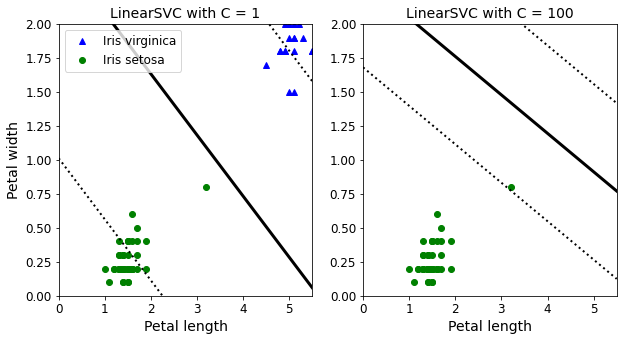

In [77]:
svm_clf1 = LinearSVC(C=1, random_state=42) #, loss="hinge": standard loss for classification
svm_clf1.fit(Xo2, yo2)   
svm_clf2 = LinearSVC(C=100, random_state=42)
svm_clf2.fit(Xo2, yo2)

# 2.2.2. Plot decision boundaries and margins
if let_plot:
    plt.figure(figsize=[10, 5])
    plt.subplot(1,2,1)
    plt.plot(Xo2[:, 0][yo2==2], Xo2[:, 1][yo2==2], "b^", label="Iris virginica")
    plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "go", label="Iris setosa")
    plt.legend(loc="upper left", fontsize=12)
    plot_svc_decision_boundary(svm_clf1, 0, 5.5)
    plt.xlabel("Petal length", fontsize=14)
    plt.ylabel("Petal width", fontsize=14)
    plt.title("LinearSVC with C = {}".format(svm_clf1.C), fontsize=14)
    plt.axis([0, 5.5, 0, 2])

    plt.subplot(1,2,2)
    plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "b^", label="Iris virginica")
    plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "go", label="Iris setosa")
    plot_svc_decision_boundary(svm_clf2, 0, 5.5)
    plt.xlabel("Petal length", fontsize=14)
    plt.title("LinearSVC with C = {}".format(svm_clf2.C), fontsize=14)
    plt.axis([0, 5.5, 0, 2])
    plt.savefig("figs/03_Different C values.png")
    plt.show()

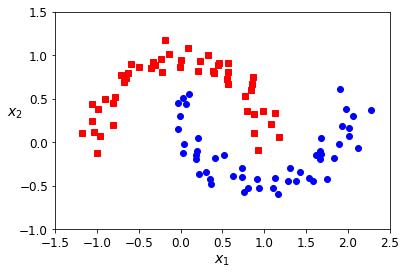

In [78]:
# 3.2. Load non-linear data
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "rs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bo")
    plt.axis(axes)
    #plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=14)
    plt.ylabel(r"$x_2$", fontsize=14, rotation=0)
if let_plot:
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    #plt.savefig("figs/04_Nonlinear_data.png");
    plt.show()

0


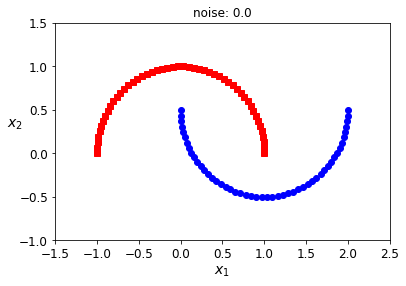

1


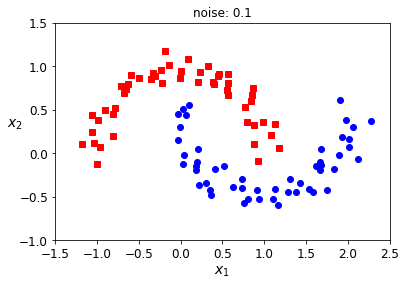

2


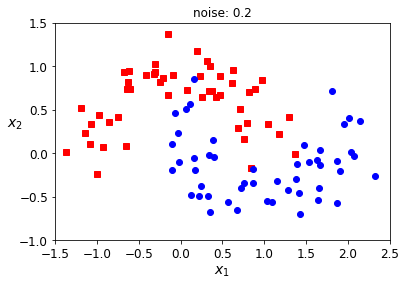

3


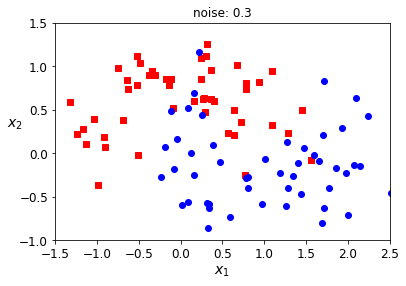

4


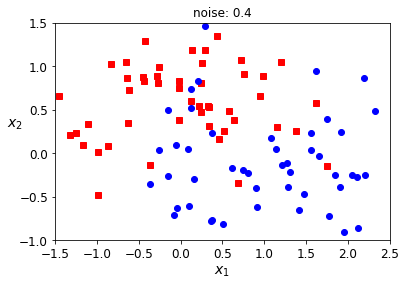

5


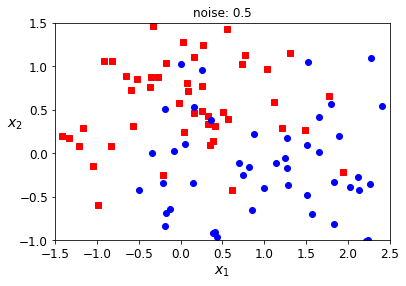

6


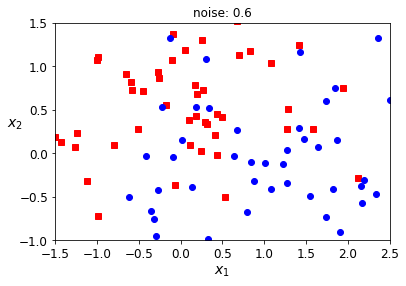

7


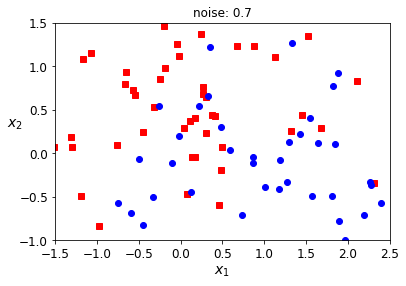

8


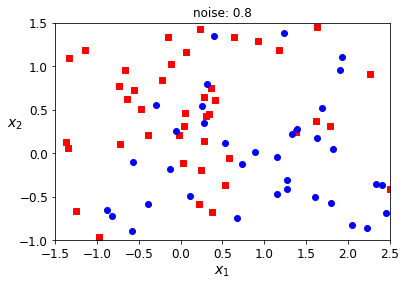

9


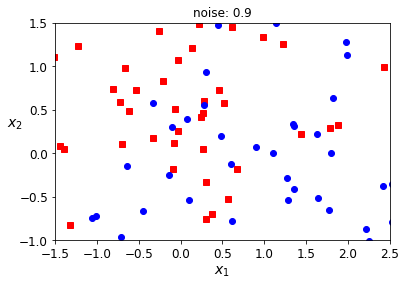

10


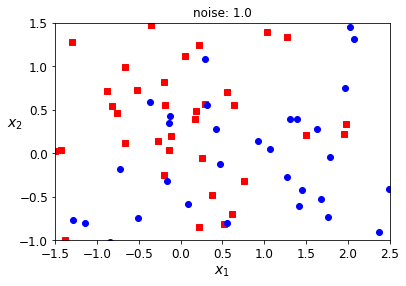

In [52]:
for i in range(0, 11):
    X, y = make_moons(n_samples=100, noise=i/10, random_state=42)
    print(i)
    if let_plot:
        plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
        plt.title("noise: " + str(i/10))
        #plt.savefig("figs/04_Nonlinear_data.png");
        plt.show()

In [79]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=40, random_state=42)) ])
polynomial_svm_clf.fit(X, y)


c:\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=40, random_state=42))])

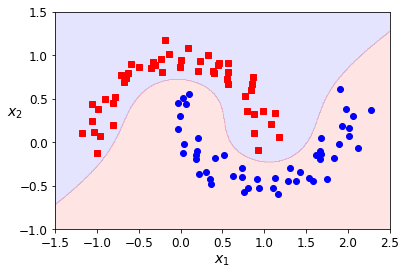

In [80]:

# Plot decision boundary
def plot_predictions(clf, axes, no_of_points=500):
    x0 = np.linspace(axes[0], axes[1], no_of_points)
    x1 = np.linspace(axes[2], axes[3], no_of_points)
    x0, x1 = np.meshgrid(x0, x1)
    X = np.c_[x0.ravel(), x1.ravel()]

    # Plot predicted labels (decision boundary)
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.bwr, alpha=0.12)  
    
    # Contour plot of samples' scores  
    #y_decision = clf.decision_function(X).reshape(x0.shape)
    #plt.contourf(x0, x1, y_decision, cmap=plt.cm.bwr, alpha=0.5)
    #plt.colorbar()

if let_plot:
    plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    plt.show()

In [81]:
from sklearn.svm import SVC
# NOTE: 
#   larger coef0 => the more the model is influenced by high-degree polynomials
poly_svm_1 = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=.001, C=5))  ]) 
poly_svm_1.fit(X, y)

poly_svm_2 = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=100, C=5))  ])
poly_svm_2.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, kernel='poly'))])

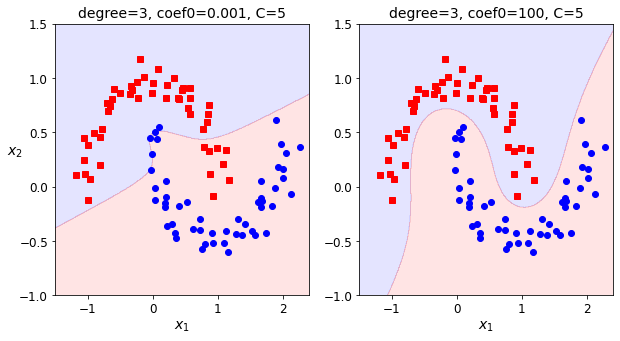

In [82]:
if let_plot:
    plt.figure(figsize=(10, 5))
    plt.subplot(1,2,1)
    plot_predictions(poly_svm_1, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
    plt.title(r"degree={}, coef0={}, C={}".format(poly_svm_1[1].degree,poly_svm_1[1].coef0,poly_svm_1[1].C), fontsize=14)

    plt.subplot(1,2,2)
    plot_predictions(poly_svm_2, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
    plt.title(r"degree={}, coef0={}, C={}".format(poly_svm_2[1].degree,poly_svm_2[1].coef0,poly_svm_2[1].C), fontsize=14)
    plt.ylabel("")
    plt.show()


In [93]:
def poly_svm_model(degree, coef, c):
    svm = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=degree, coef0=coef, C=c))  ]) 
    svm.fit(X, y)
    return svm

def plot_by_svm_model(poly_svm, a, b, c):
    plt.figure(figsize=(10, 5))
    plt.subplot(a, b, c)
    plot_predictions(poly_svm, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
    plt.title(r"degree={}, coef0={}, C={}".format(poly_svm[1].degree,poly_svm[1].coef0,poly_svm[1].C), fontsize=14)

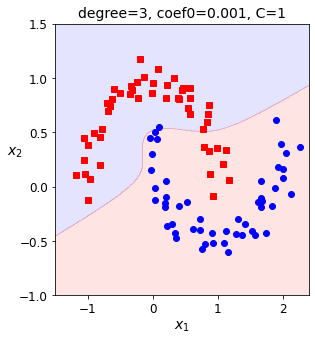

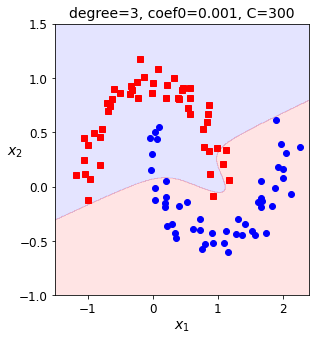

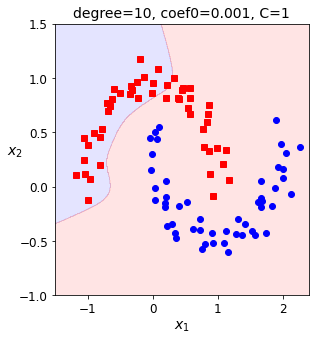

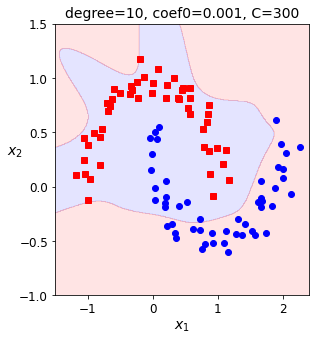

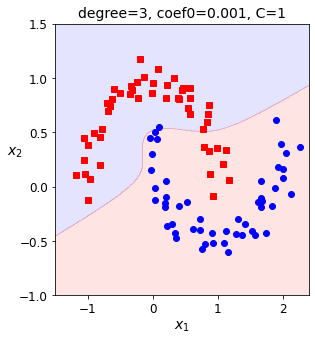

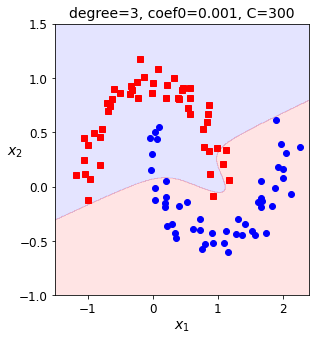

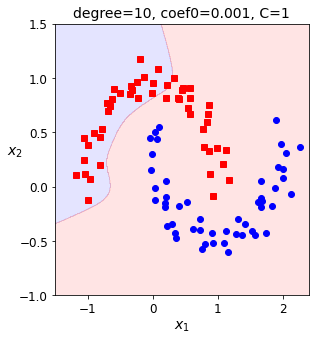

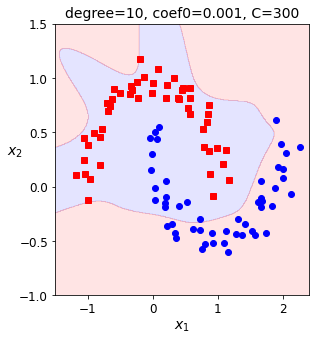

In [113]:
poly_svm_1 = poly_svm_model(3, 0.001, 1)
poly_svm_2 = poly_svm_model(3, 0.001, 300)
poly_svm_3 = poly_svm_model(10, 0.001, 1)
poly_svm_4 = poly_svm_model(10, 0.001, 300)
poly_svm_5 = poly_svm_model(3, 0.001, 1)
poly_svm_6 = poly_svm_model(3, 0.001, 300)
poly_svm_7 = poly_svm_model(10, 0.001, 1)
poly_svm_8 = poly_svm_model(10, 0.001, 300)
plot_by_svm_model(poly_svm_1, 1, 2, 1)
plot_by_svm_model(poly_svm_2, 1, 2, 2)
plot_by_svm_model(poly_svm_3, 1, 2, 1)
plot_by_svm_model(poly_svm_4, 1, 2, 2)
plot_by_svm_model(poly_svm_5, 1, 2, 1)
plot_by_svm_model(poly_svm_6, 1, 2, 2)
plot_by_svm_model(poly_svm_7, 1, 2, 1)
plot_by_svm_model(poly_svm_8, 1, 2, 2)


In [114]:
X_1D = np.array([-4, -3, -2, -1, 0, 1, 2, 3, 4]).reshape(-1,1) 
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0]) # 2 classes

# 5.2. Plot Gaussian kernel graphs
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)
def plot_kernel(X_1D,y,landmark,gamma, no_plot_points=200, xy_lim = [-4.5, 4.5, -0.1, 1.1]):  
    # Plot samples:
    plt.axhline(y=0, color='k') # Ox axis
    plt.plot(X_1D[y==0], np.zeros(4), "rs", markersize=9, label="Data samples (class 0)")
    plt.plot(X_1D[y==1], np.zeros(5), "g^", markersize=9, label="Data samples (class 1)")

    # Plot the landmark:
    plt.scatter(landmark, [0], s=200, alpha=0.5, c="orange")
    plt.annotate(r'landmark',xytext=(landmark, 0.2),
                 xy=(landmark, 0), ha="center", fontsize=14,
                 arrowprops=dict(facecolor='black', shrink=0.1)  )
    
    # Plot Gaussian kernel graph: 
    x1_plot = np.linspace(-4.5, 4.5, no_plot_points).reshape(-1,1)  
    x2_plot = gaussian_rbf(x1_plot, landmark, gamma)
    plt.plot(x1_plot, x2_plot, "b--", linewidth=2, label="Gaussian kernel")
    
    plt.xlabel(r"$x_1$", fontsize=14)
    plt.ylabel(r"$x_2$ (similarity feature)", fontsize=13)
    #plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
    plt.axis(xy_lim)
    plt.title(r"Gaussian kernel with $\gamma={}$".format(gamma), fontsize=14)

# Gaussian kernel 1

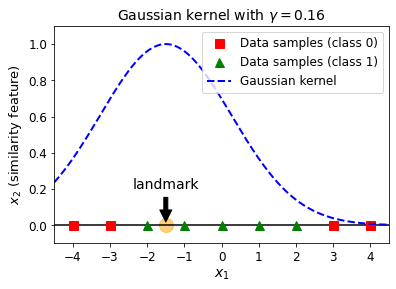

In [115]:
landmark1 = np.array([-1.5])
gamma1 = 0.16
if let_plot:
    plot_kernel(X_1D,y,landmark1,gamma1)    
    plt.legend(fontsize=12, loc="upper right")
    plt.show()

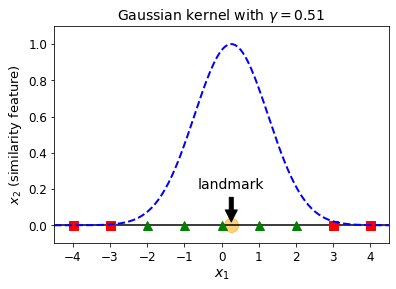

In [116]:
landmark2 = np.array([0.26])
gamma2 = 0.51
if let_plot:
    plot_kernel(X_1D,y,landmark2,gamma2)    
    #plt.legend(fontsize=12, loc="upper right")
    plt.show()


In [118]:
def plot_transformed_data(X_2D,y,xy_lim=[-4.5, 4.5, -0.1, 1.1]):
    plt.axhline(y=0, color='k') # Ox
    #plt.axvline(x=0, color='k') # Oy
    plt.plot(X_2D[:, 0][y==0], X_2D[:, 1][y==0], "rs", markersize=9, label="Samples (class 0)")
    plt.plot(X_2D[:, 0][y==1], X_2D[:, 1][y==1], "g^", markersize=9, label="Samples (class 1)")

    plt.xlabel(r"$x_1$", fontsize=14)
    plt.ylabel(r"$x_2$ (similarity feature)", fontsize=14)
    plt.axis(xy_lim)
    plt.title("Data in new feature space", fontsize=14)

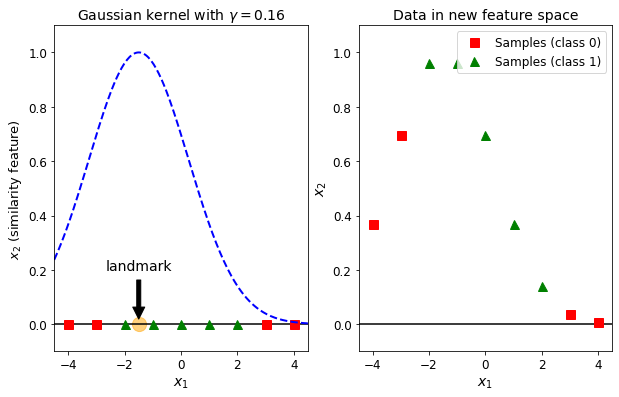

In [119]:
if let_plot:
    plt.figure(figsize=(10, 6))
    plt.subplot(121)
    plot_kernel(X_1D,y,landmark1,gamma1)    
    #plt.legend(fontsize=10, loc="upper right")

    plt.subplot(122)
    X_2D = np.c_[X_1D, gaussian_rbf(X_1D, landmark1, gamma1)]
    plot_transformed_data(X_2D,y)
    plt.legend(fontsize=12, loc="upper right")
    plt.ylabel("$x_2$",fontsize=14)
    plt.show()


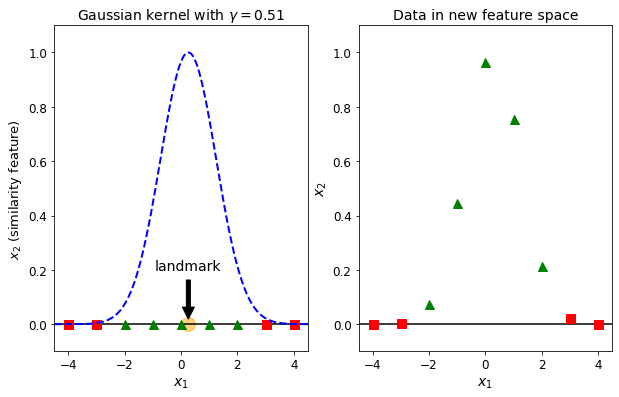

In [120]:
if let_plot:
    plt.figure(figsize=(10, 6))
    plt.subplot(121)
    plot_kernel(X_1D,y,landmark2,gamma2)    
    #plt.legend(fontsize=10, loc="upper right")

    plt.subplot(122)
    X_2D = np.c_[X_1D, gaussian_rbf(X_1D, landmark2, gamma2)]
    plot_transformed_data(X_2D,y)
    #plt.legend(fontsize=12, loc="upper right")
    plt.ylabel("$x_2$",fontsize=14)
    plt.show()


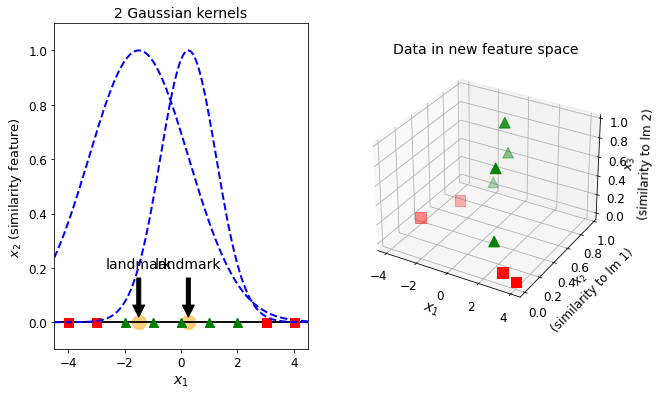

In [121]:
if let_plot:
    fig = plt.figure(figsize=(10, 6))
    plt.subplot(121)
    plot_kernel(X_1D,y,landmark1,gamma1)    
    plot_kernel(X_1D,y,landmark2,gamma2)    
    plt.title("2 Gaussian kernels", fontsize=14)#plt.legend(fontsize=10, loc="upper right")

    #from mpl_toolkits.mplot3d import Axes3D 
    ax = fig.add_subplot(122, projection='3d')
    X_3D = np.c_[X_1D, gaussian_rbf(X_1D, landmark1, gamma1), 
                 gaussian_rbf(X_1D, landmark2, gamma2)]
    ax.scatter(X_3D[:, 0][y==0], X_3D[:, 1][y==0], X_3D[:, 2][y==0], 
                s=115,c="red",marker='s',label="Samples (class 0)")
    ax.scatter(X_3D[:, 0][y==1], X_3D[:, 1][y==1], X_3D[:, 2][y==1], 
                s=115,c="green",marker='^',label="Samples (class 1)")

    ax.set_xlabel("$x_1$", fontsize=14)
    ax.set_ylabel("$x_2$\n(similarity to lm 1)", fontsize=12)
    ax.set_zlabel("$x_3$\n(similarity to lm 2)", fontsize=12)
    plt.title("Data in new feature space", fontsize=14)
    plt.show()


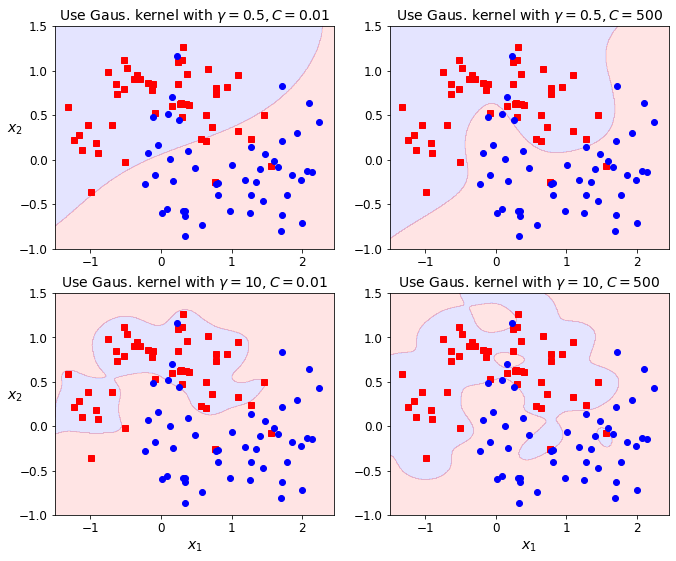

In [132]:
# 5.6. Kernel trick for method 2 (Gaussian kernel)
# Generate non-linear data
X, y = make_moons(n_samples=100, noise=0.3, random_state=42)


# Train several Gaussian SVMs using Kernel trick 
gamma1, gamma2 = 0.5, 10
C1, C2 = 0.01, 500
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    Gaus_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("", SVC(kernel="rbf", gamma=gamma, C=C)) ])
    Gaus_kernel_svm_clf.fit(X, y)
    svm_clfs.append(Gaus_kernel_svm_clf)

# Plot boundaries by different SVMs
plt.figure(figsize=(11, 9))
for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(2,2,i+1)
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"Use Gaus. kernel with $\gamma = {}, C = {}$".format(gamma, C), fontsize=14)
    if i in (0, 1): 
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")
plt.show()

In [ ]:
def Gaus_kernel_svm_clf_model(gamma, c):
  gaus_svm = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=c))  ])
  gaus_svm.fit(X, y)
  gaus_svm.predict(X)
  return gaus_svm




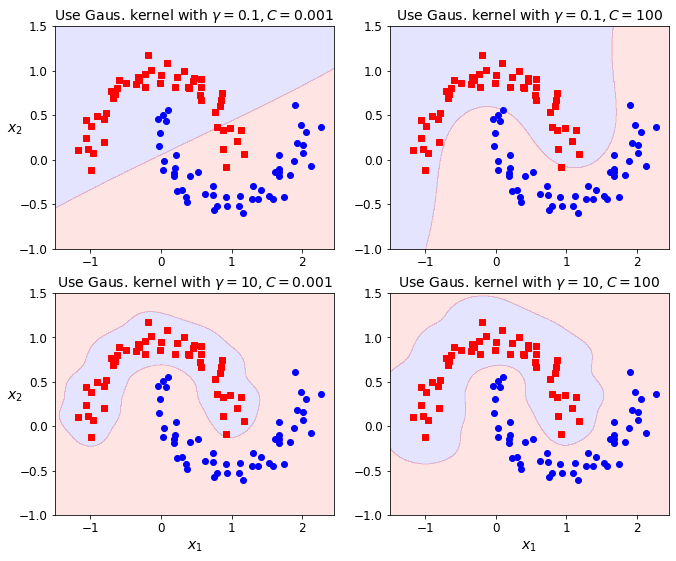

In [129]:
# 5.6. Kernel trick for method 2 (Gaussian kernel)
# Generate non-linear data
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)


# Train several Gaussian SVMs using Kernel trick 
gamma1, gamma2 = 0.1, 10
C1, C2 = 0.001, 100
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    Gaus_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("", SVC(kernel="rbf", gamma=gamma, C=C)) ])
    Gaus_kernel_svm_clf.fit(X, y)
    svm_clfs.append(Gaus_kernel_svm_clf)

# Plot boundaries by different SVMs
plt.figure(figsize=(11, 9))
for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(2,2,i+1)
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"Use Gaus. kernel with $\gamma = {}, C = {}$".format(gamma, C), fontsize=14)
    if i in (0, 1): 
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")
plt.show()